In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf

In [ ]:
import yfinance as yf
from datetime import datetime
import streamlit as st

# Streamlit UI
st.title("📈 Stock Price Predictor App")

# Default start and end dates (Last 20 years)
end_default = datetime.now()
start_default = datetime(end_default.year - 20, end_default.month, end_default.day)

# User input for custom dates
start_date = st.date_input("Select Start Date:", value=start_default)
end_date = st.date_input("Select End Date:", value=end_default)

# Convert to datetime format
start = datetime.combine(start_date, datetime.min.time())
end = datetime.combine(end_date, datetime.min.time())

# Stock symbol input
stock = st.text_input("Enter Stock Symbol (e.g., GOOG, AAPL)", "GOOG")

# Fetch stock data
if st.button("Fetch Data"):
    data = yf.download(stock, start=start, end=end)
    st.subheader(f"Stock Data for {stock}")
    st.write(data.tail())  # Display last few rows

    # Plot Closing Price
    st.subheader("Stock Closing Price Over Time")
    st.line_chart(data["Close"])


2025-04-15 12:23:39.262 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.012 
  command:

    streamlit run C:\Users\shrva\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-15 12:23:40.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 12:23:40.020 Thre

In [4]:
# Define stock symbol
stock = "GOOG"

# Download stock data with increased timeout
google_data = yf.download(stock, start=start, end=end, timeout=30)

# Rename 'Close' column to 'Adj_Close'
google_data.rename(columns={'Close': 'Adj_Close'}, inplace=True)

# Display first few rows
print(google_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price      Adj_Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                         
2005-04-15  4.586008  4.718382  4.577579  4.712433  464831797
2005-04-18  4.634842  4.657401  4.548576  4.575596  262994085
2005-04-19  4.744659  4.759533  4.661119  4.693345  338463908
2005-04-20  4.910747  4.970241  4.856459  4.922645  620376641
2005-04-21  5.062457  5.081793  4.940990  4.968258  712737539


In [5]:
google_data.head()

Price,Adj_Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-04-15,4.586008,4.718382,4.577579,4.712433,464831797
2005-04-18,4.634842,4.657401,4.548576,4.575596,262994085
2005-04-19,4.744659,4.759533,4.661119,4.693345,338463908
2005-04-20,4.910747,4.970241,4.856459,4.922645,620376641
2005-04-21,5.062457,5.081793,4.940990,4.968258,712737539


In [6]:
google_data.shape

(5032, 5)

In [7]:
google_data.describe()

Price,Adj_Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,50.935043,51.458010,50.398078,50.912992,1.032108e+08
std,48.593456,49.117520,48.069044,48.563365,1.340823e+08
min,4.586008,4.657401,4.548576,4.575596,1.584340e+05
25%,13.591564,13.743644,13.423121,13.580346,2.612200e+07
50%,28.843786,29.032652,28.592201,28.851756,4.787442e+07
75%,70.050463,70.789951,69.197000,70.035284,1.256091e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-04-15 to 2025-04-14
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj_Close, GOOG)  5032 non-null   float64
 1   (High, GOOG)       5032 non-null   float64
 2   (Low, GOOG)        5032 non-null   float64
 3   (Open, GOOG)       5032 non-null   float64
 4   (Volume, GOOG)     5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [9]:
google_data.isna().sum()

Price      Ticker
Adj_Close  GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x500 with 0 Axes>

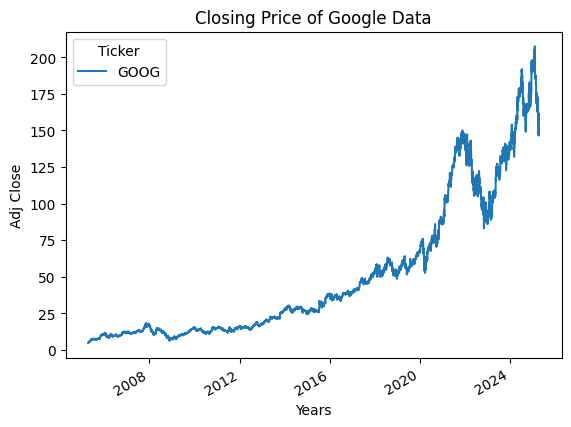

In [11]:
plt.figure(figsize=(15,5))
google_data['Adj_Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")
plt.show()


In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    if isinstance(values, pd.Series):  
        values.plot()
    else:  
        values.plot(figsize=figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()


In [13]:
google_data.columns

MultiIndex([('Adj_Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

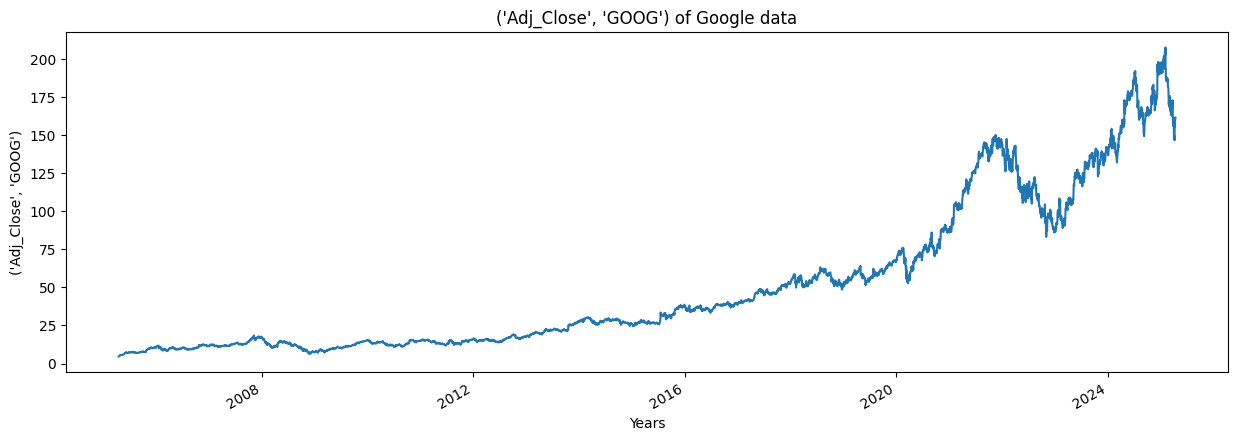

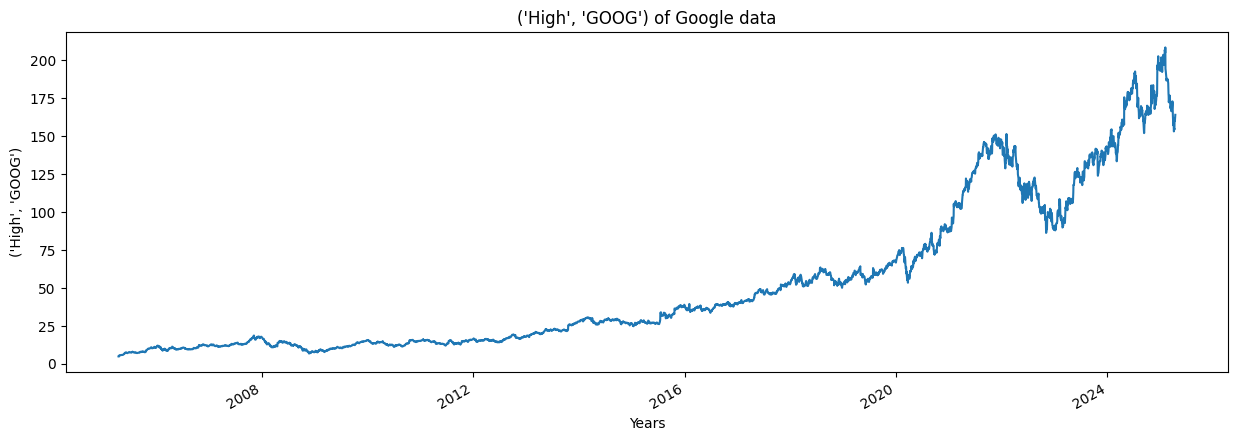

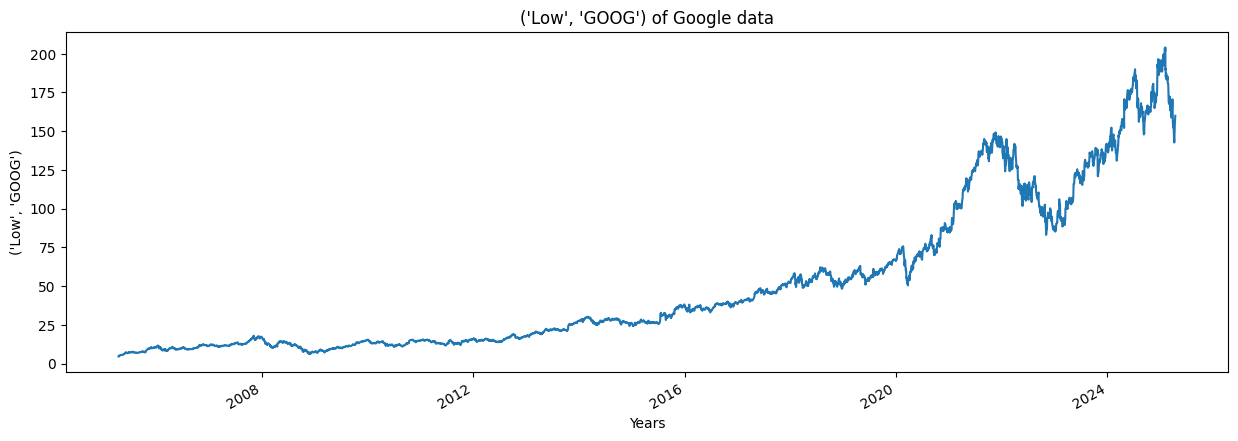

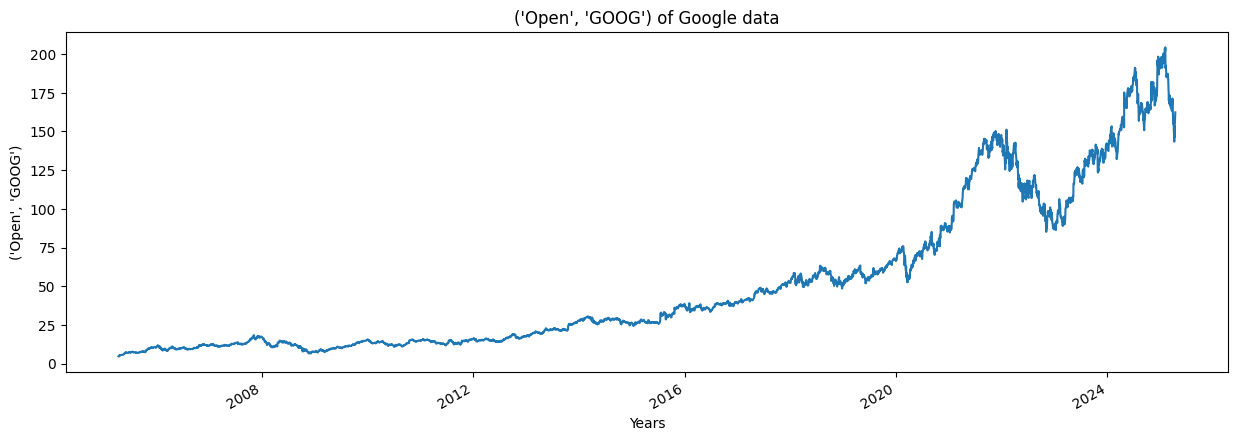

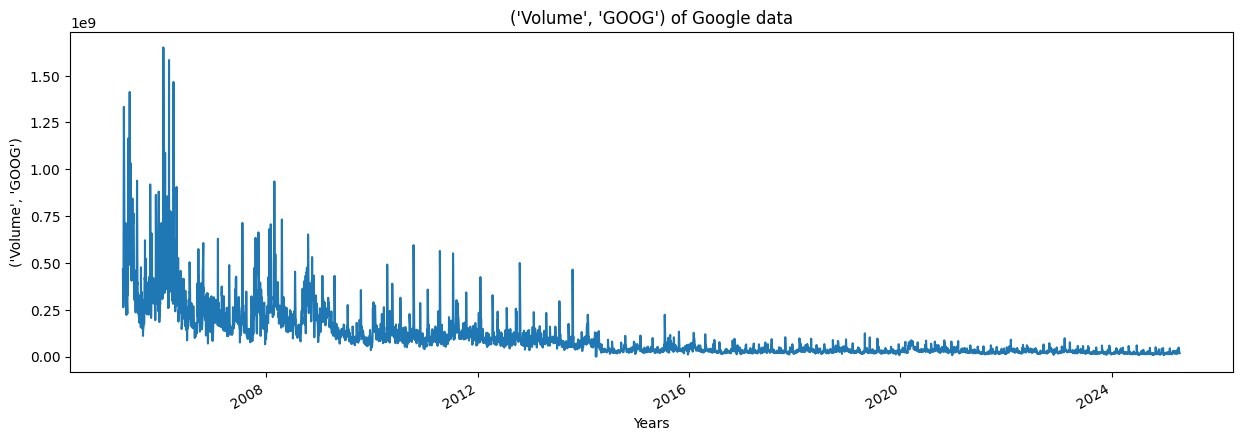

In [14]:
import pandas as pd
for column in google_data.select_dtypes(include=['number']).columns:  # Select only numeric columns
    plot_graph((15, 5), google_data[column], column)


In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
import pandas as pd

# Redefine the data DataFrame
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Rename the column for better readability
data.columns = ['Value']  
data['MA'] = data['Value'].rolling(5).mean()
data


,Value,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
google_data.index = pd.to_datetime(google_data.index)
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

2004 0
2005 181
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [20]:
google_data['MA_for_250_days'] = google_data['Adj_Close'].rolling(250).mean()

In [21]:
google_data.iloc[:250]['MA_for_250_days'].tail()


Date
2006-04-05         NaN
2006-04-06         NaN
2006-04-07         NaN
2006-04-10         NaN
2006-04-11    8.288602
Name: MA_for_250_days, dtype: float64

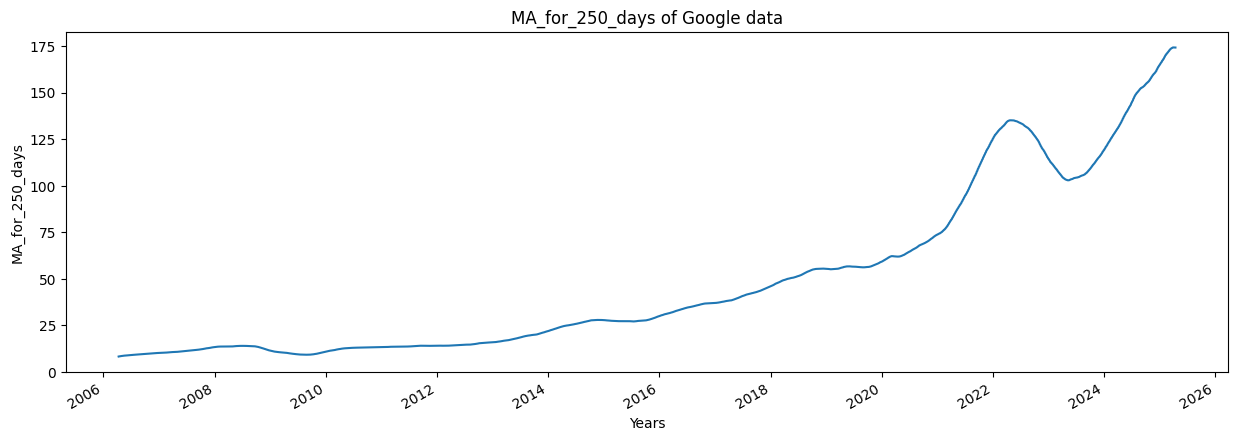

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

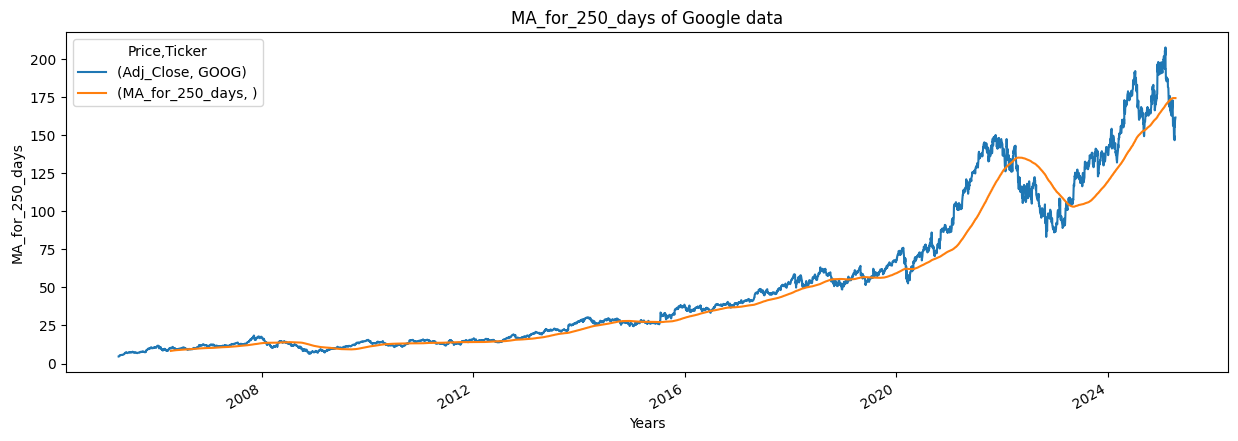

In [23]:
plot_graph((15,5), google_data[['Adj_Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

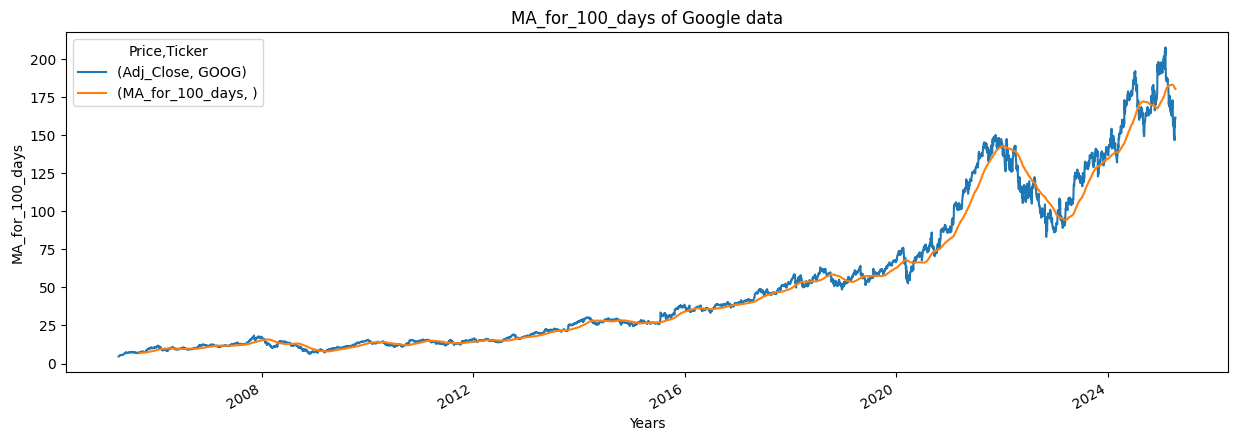

In [24]:
google_data['MA_for_100_days'] = google_data['Adj_Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj_Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

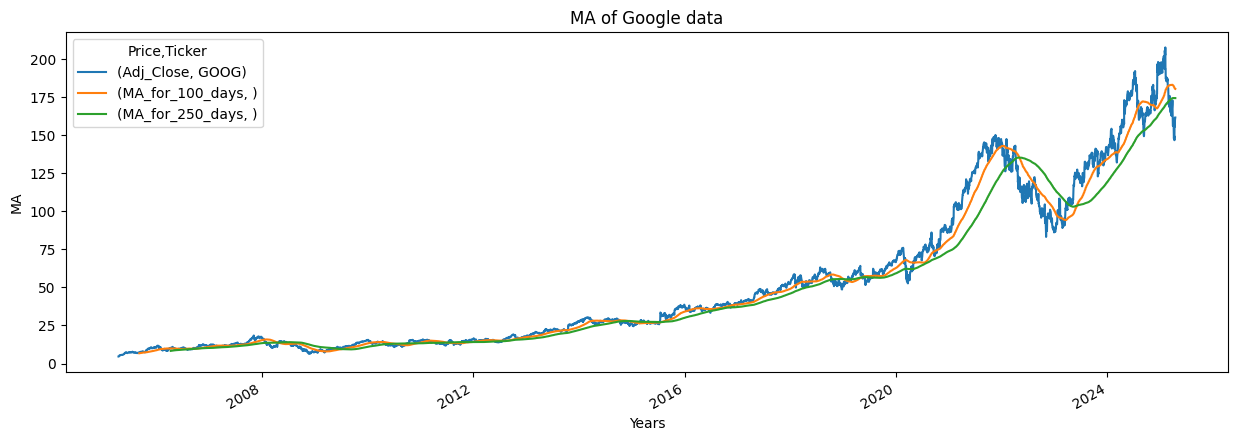

In [25]:
plot_graph((15,5), google_data[['Adj_Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj_Close'].pct_change()
google_data[['Adj_Close','percentage_change_cp']].head()

Price,Adj_Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-04-15,4.586008,NaN
2005-04-18,4.634842,0.010649
2005-04-19,4.744659,0.023694
2005-04-20,4.910747,0.035005
2005-04-21,5.062457,0.030893


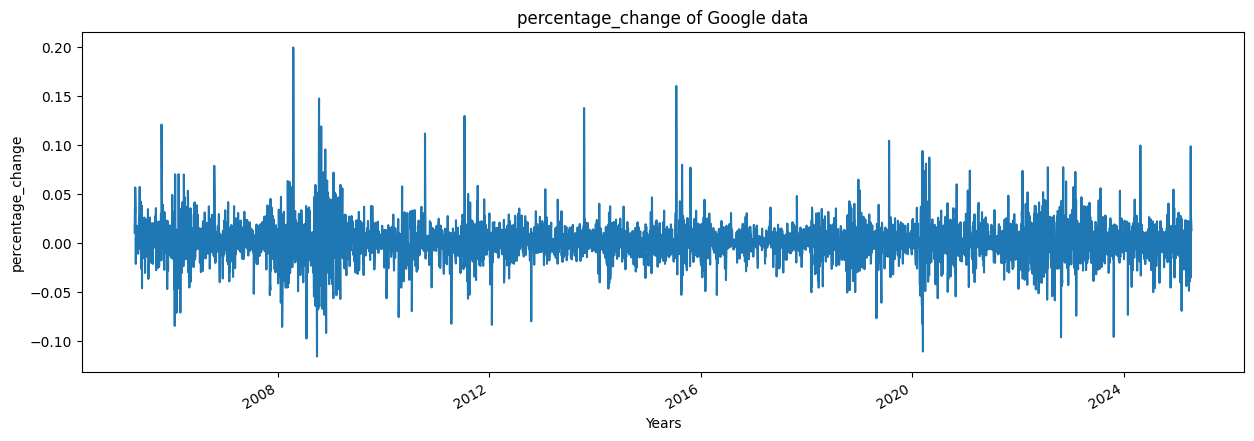

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj_Close']]

In [29]:
Adj_close_price.max(), Adj_close_price.min()


(Price      Ticker
 Adj_Close  GOOG      207.473633
 dtype: float64,
 Price      Ticker
 Adj_Close  GOOG      4.586008
 dtype: float64)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [2.40698764e-04],
       [7.81966627e-04],
       ...,
       [7.43189671e-01],
       [7.63052878e-01],
       [7.73255606e-01]])

In [31]:
len(scaled_data)

5032

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.0002407 ],
        [0.00078197],
        [0.00160059],
        [0.00234834],
        [0.00376443],
        [0.00470768],
        [0.00412364],
        [0.00424949],
        [0.00420918],
        [0.00427637],
        [0.00455617],
        [0.00503268],
        [0.00531492],
        [0.0051292 ],
        [0.00525627],
        [0.00501191],
        [0.00522939],
        [0.00565581],
        [0.0053418 ],
        [0.00540533],
        [0.00562648],
        [0.00588063],
        [0.00661738],
        [0.00661982],
        [0.00691673],
        [0.00860773],
        [0.00867493],
        [0.00926262],
        [0.00906591],
        [0.00989675],
        [0.01127374],
        [0.01258475],
        [0.01257253],
        [0.01163906],
        [0.01294397],
        [0.01321032],
        [0.01155354],
        [0.01237826],
        [0.01191275],
        [0.0119433 ],
        [0.01140569],
        [0.01097195],
        [0.01129451],
        [0.01164395],
        [0

In [34]:

int(len(x_data)*0.7)

3452

In [35]:
4908-100-int(len(x_data)*0.7)

1356

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])




C:\Users\shrva\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [41]:
model.fit(x_train, y_train, batch_size=16, epochs=5, verbose=1)


Epoch 1/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - loss: 0.0021
Epoch 2/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 3.1797e-05
Epoch 3/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - loss: 3.3616e-05
Epoch 4/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 2.4816e-05
Epoch 5/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 2.6429e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,245 (1.35 MB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,164 (922.52 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [44]:
predictions

array([[0.25438046],
       [0.2538237 ],
       [0.25306976],
       ...,
       [0.674806  ],
       [0.6720468 ],
       [0.67122954]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
inv_predictions

array([[ 56.19666 ],
       [ 56.083694],
       [ 55.930733],
       ...,
       [141.49579 ],
       [140.93599 ],
       [140.77017 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
inv_y_test

array([[ 56.44017029],
       [ 55.55984497],
       [ 55.63399124],
       ...,
       [155.36999512],
       [159.3999939 ],
       [161.47000122]])

In [47]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))  

In [48]:
rmse

np.float64(11.121723386195661)

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:])
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-28,56.440170,56.196659
2019-05-29,55.559845,56.083694
2019-05-30,55.633991,55.930733
2019-05-31,54.921368,55.761070
2019-06-03,51.567253,55.552593


<Figure size 1500x600 with 0 Axes>

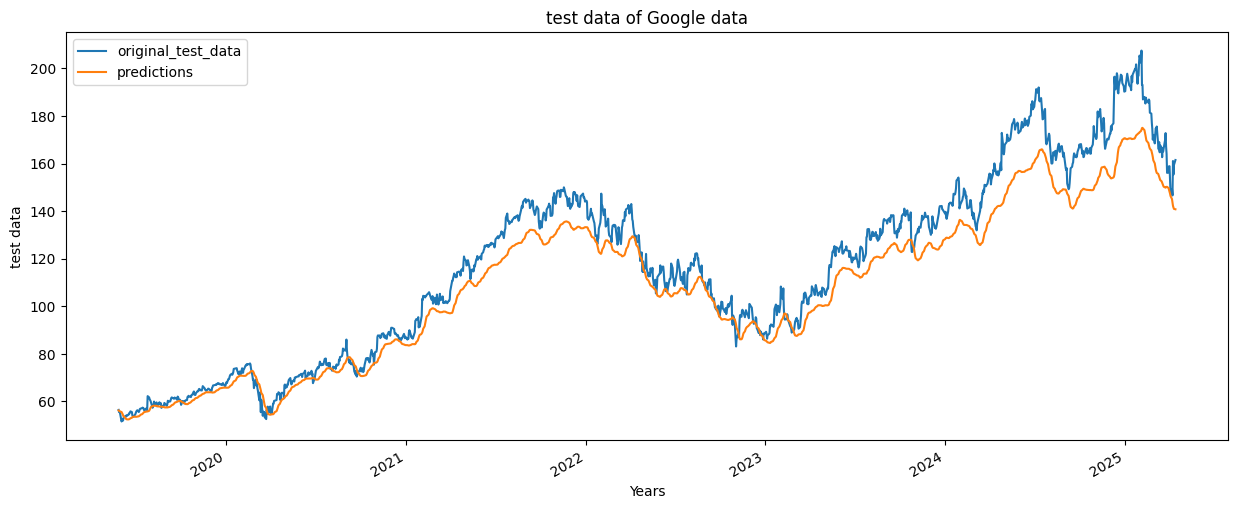

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

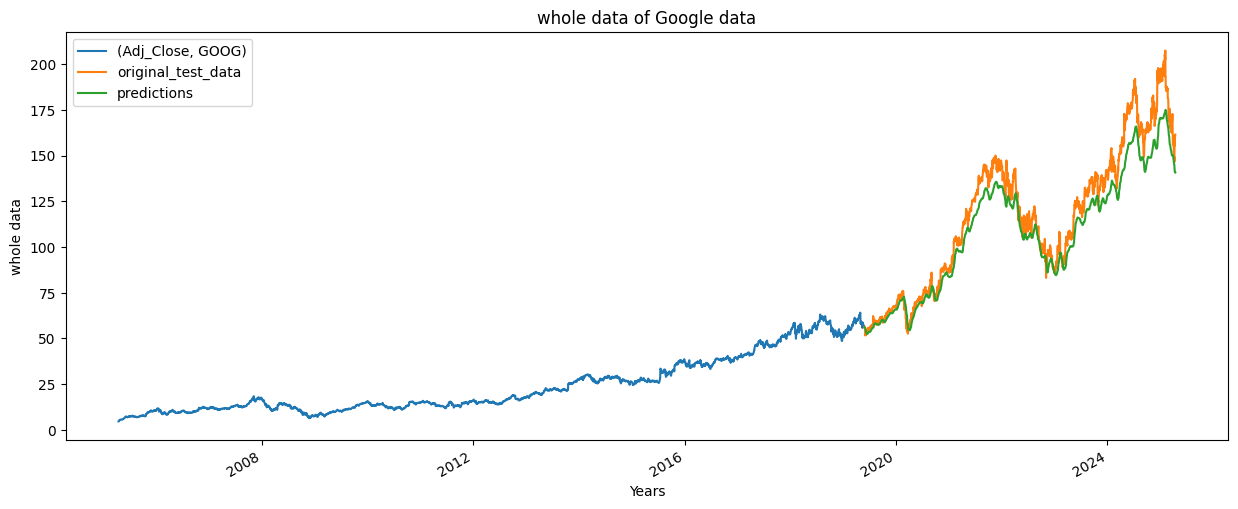

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")
